# The Neural Code: Exercises 4

In [95]:
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt

%matplotlib notebook

## 2. Model identification

Consider a kernel function:
$$H(t) = sin(\frac{2 \pi t}{0.1 s})~exp(\frac{-t}{0.06 s})$$

(a) Write a python function that generates a white noise stimulus $x(t)$ with mean $0$ and variance
$\sigma^2 = 10$ for a duration of $10s$. You can do this by sampling $X \sim N(0, \sigma^2)$ for every time bin (use
numpy.random.normal).

<IPython.core.display.Javascript object>


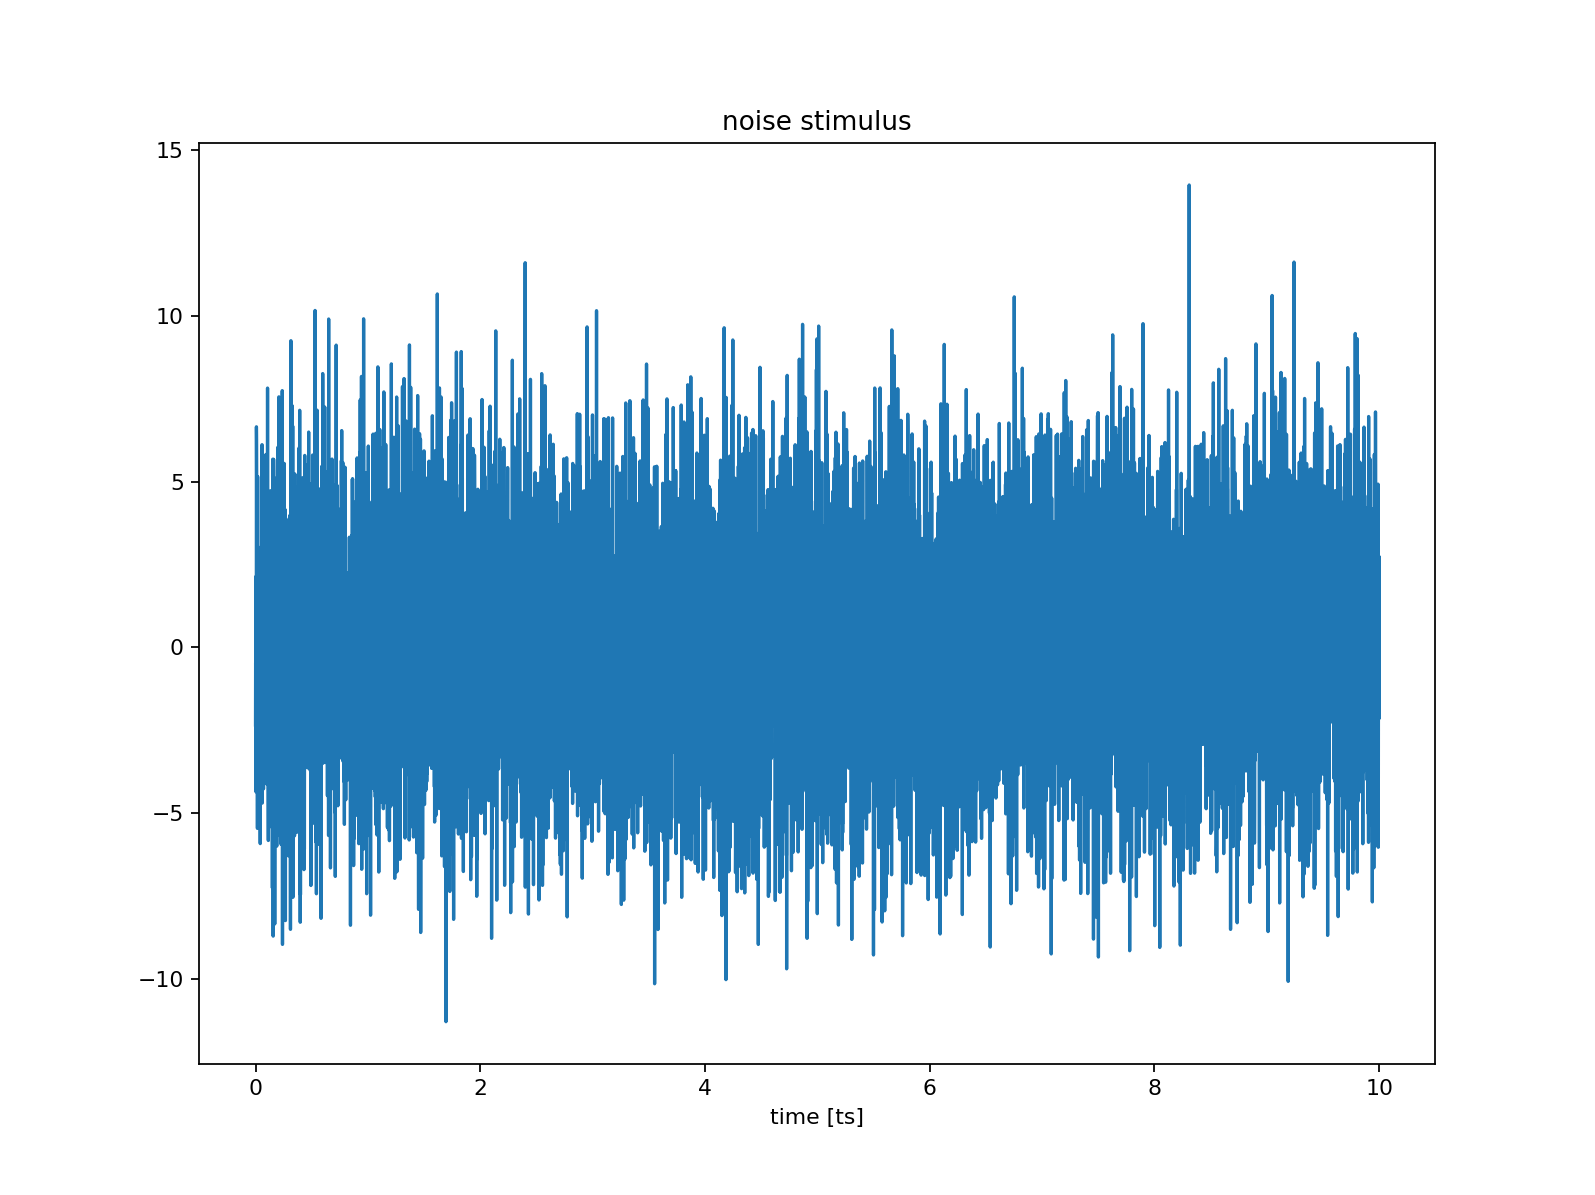

Text(0.5, 1.0, 'noise stimulus')

In [49]:
ts = 0.001
T = 10
mean = 0
variance = 10
sigma = np.sqrt(variance)

t = np.arange(0, T + ts, ts)
x = np.random.normal(mean, sigma, len(t))

plt.figure()
plt.plot(t, x)
plt.xlabel('time [ts]')
plt.title('noise stimulus')

In [39]:
t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

(b) Convolve the white noise stimulus $x(t)$ with the kernel $H(t)$ to obtain the output firing rate $y(t)$
(use numpy.convolve).

<IPython.core.display.Javascript object>


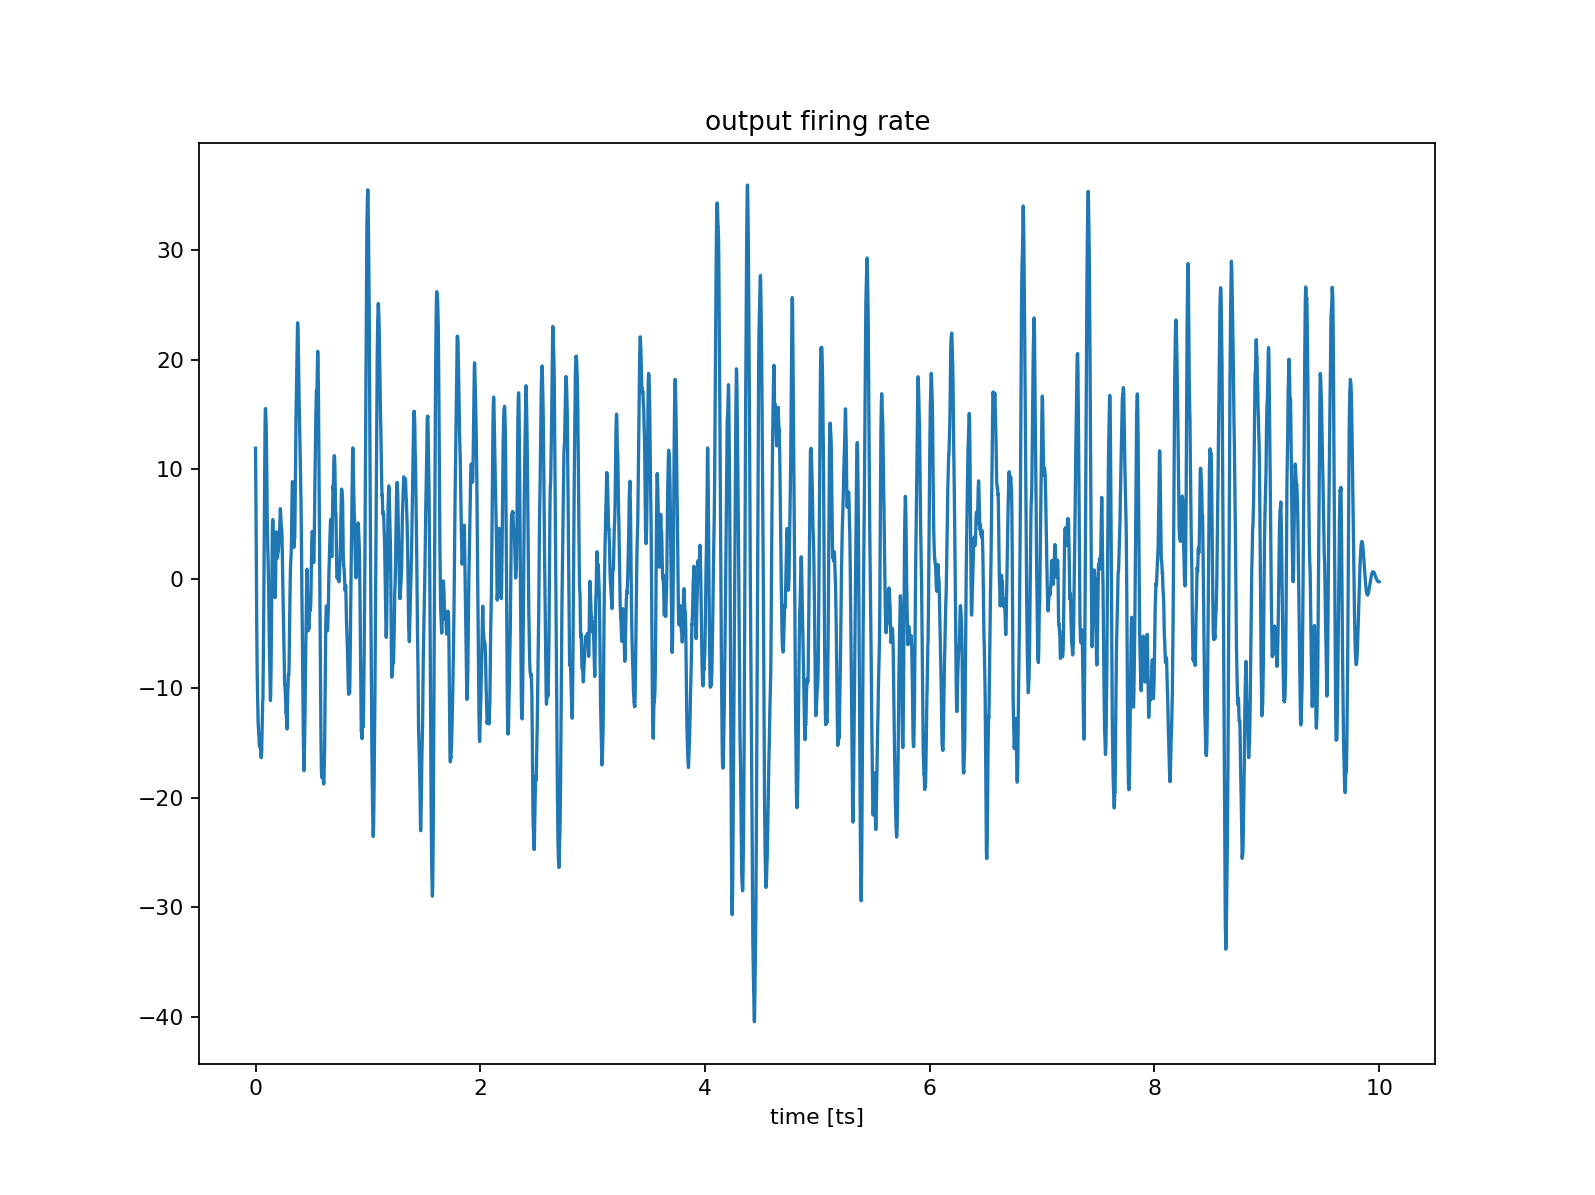

Text(0.5, 1.0, 'output firing rate')

In [50]:
h = np.sin(2*np.pi*t[:500]/0.1) * np.exp(-t[:500]/0.06)
y = np.convolve(x, h, mode = 'same')

plt.figure()
plt.plot(t, y)
plt.xlabel('time [ts]')
plt.title('output firing rate')

<IPython.core.display.Javascript object>


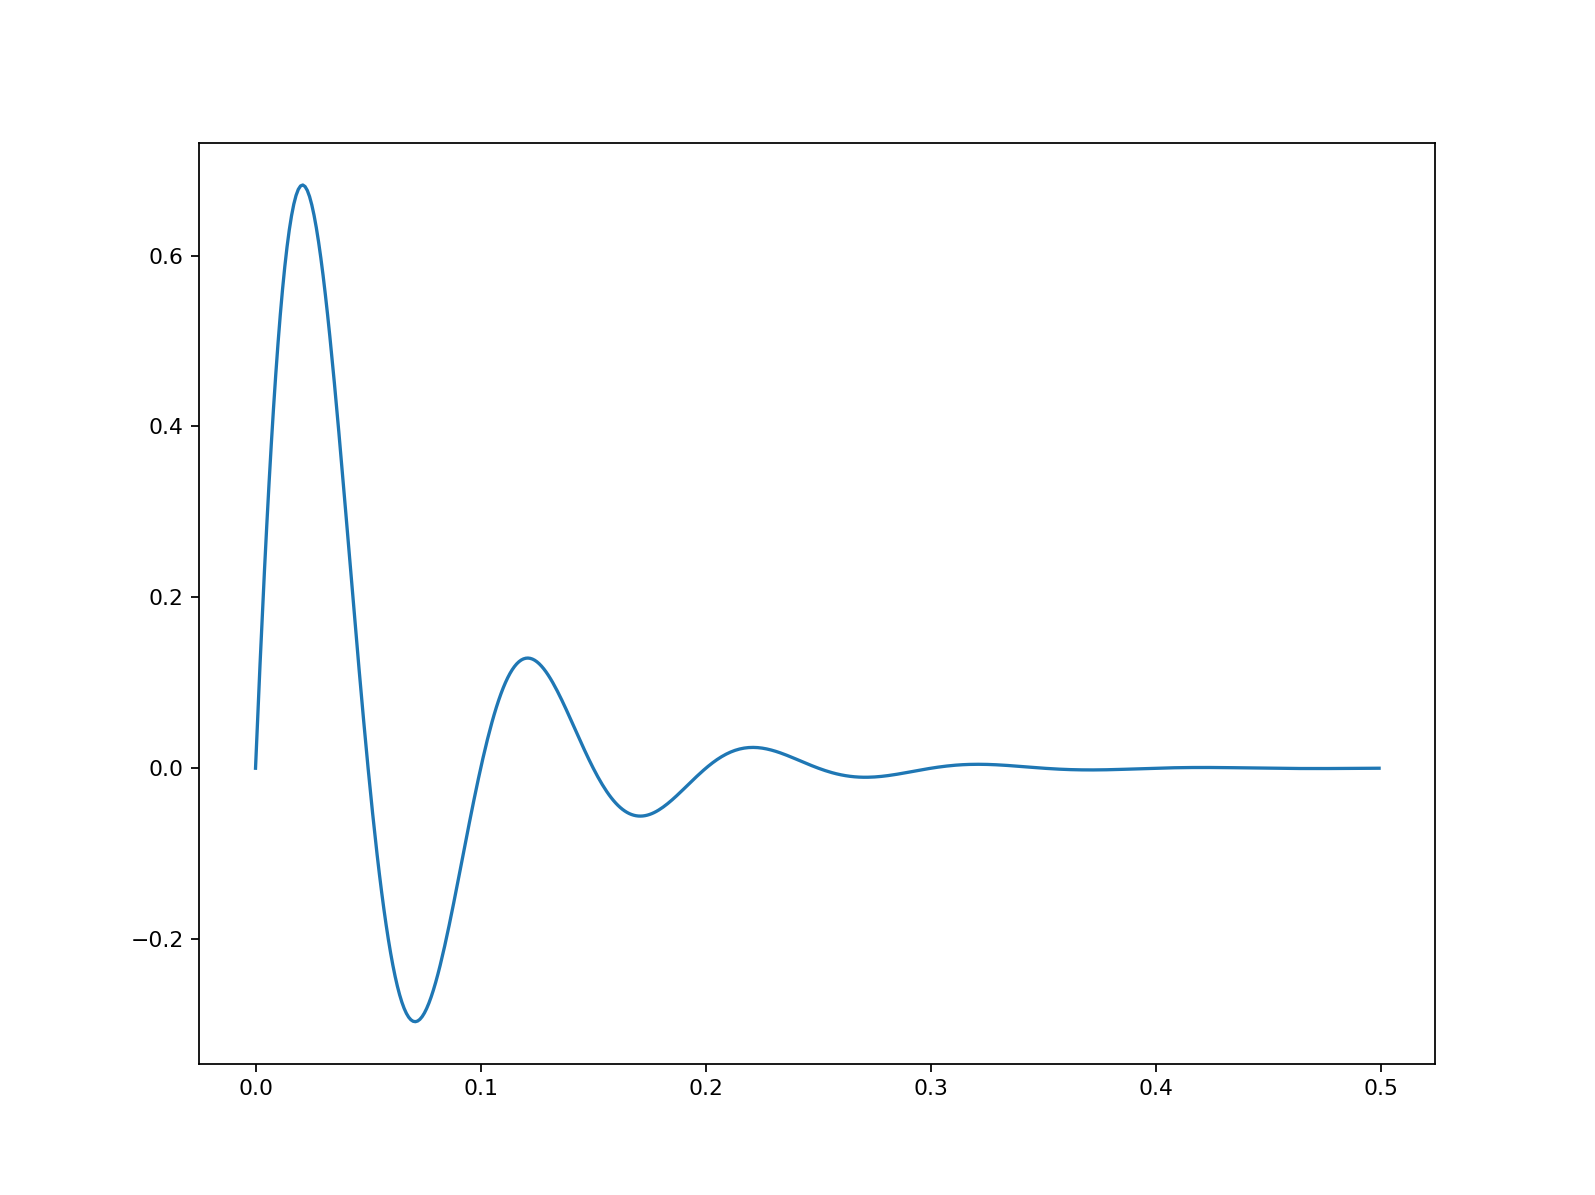

In [51]:
plt.figure()
plt.plot(t[:500], h)

Approximate the kernel function by reverse correlation (use numpy.correlate)

<IPython.core.display.Javascript object>


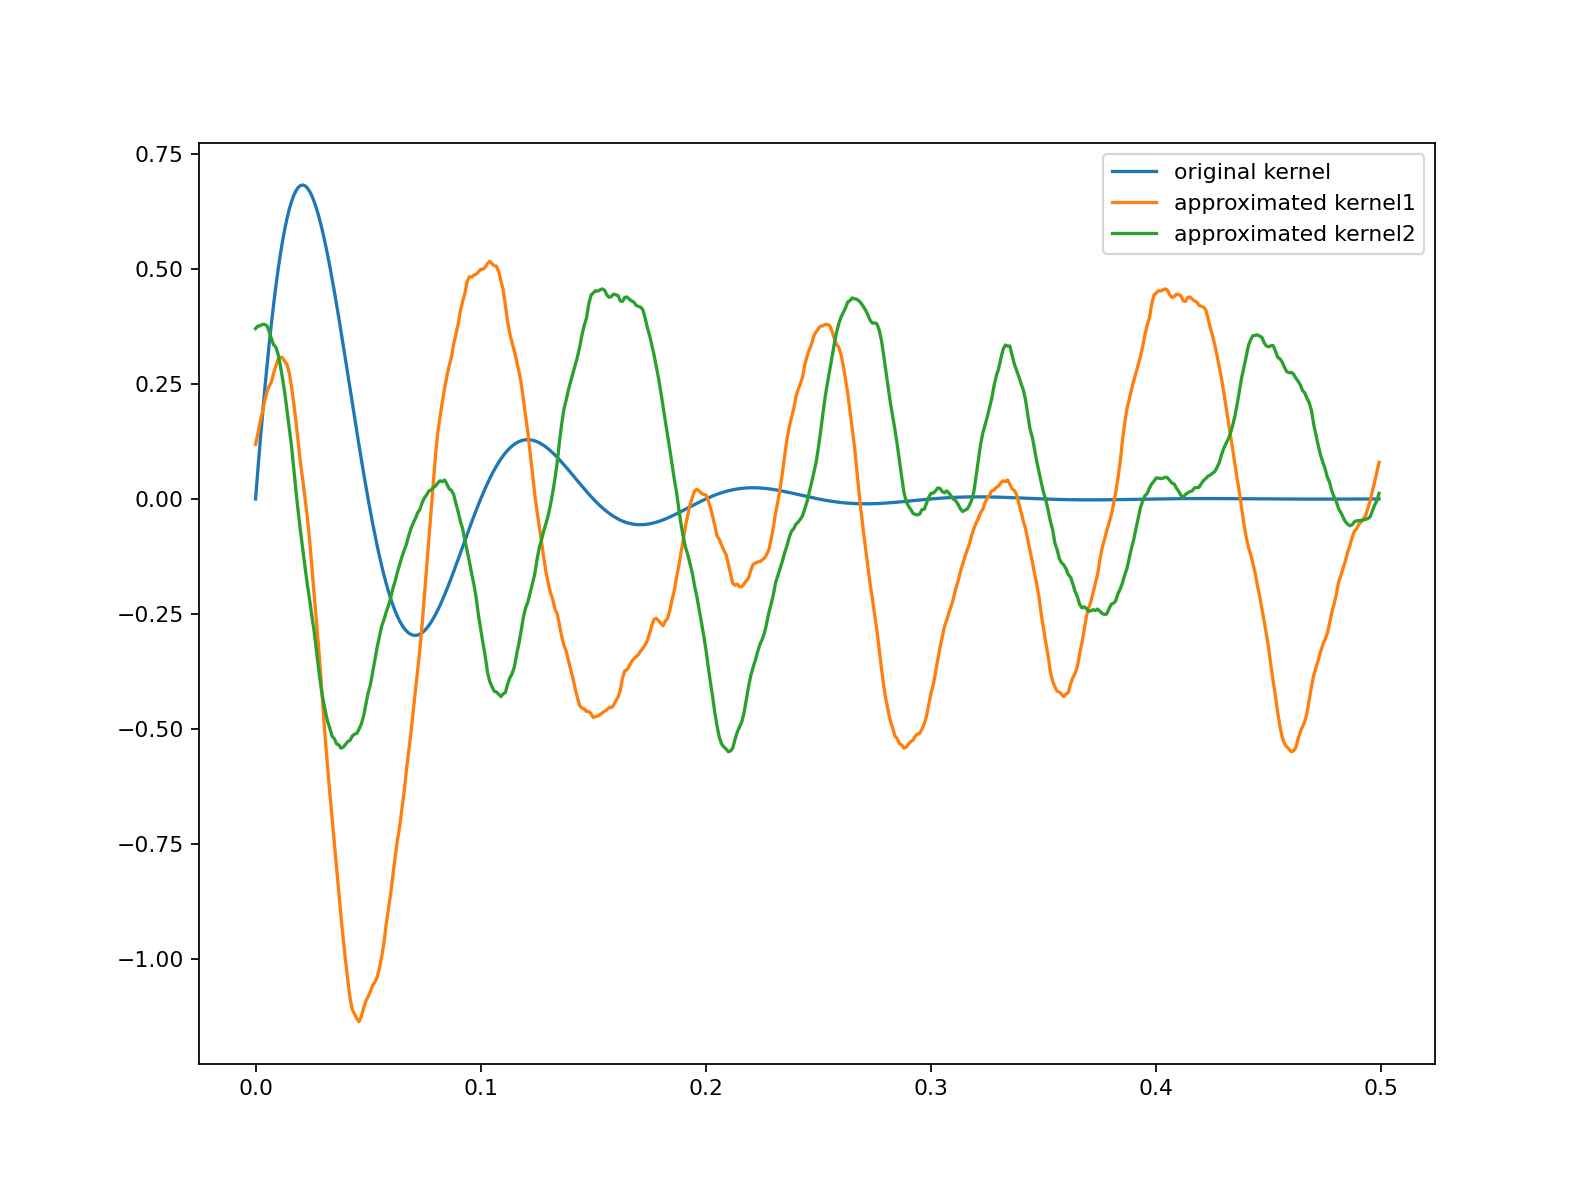

In [83]:
# shift time axis appropriately!!!

x_reversed = np.flip(x)
reverse_corr1 = ts * (1/sigma**2) * np.correlate(x_reversed, y, mode = 'full')
reverse_corr2 = ts * (1/sigma**2) * np.correlate(x_reversed, y, mode = 'same')

plt.figure()
plt.plot(t[:500], h, label = 'original kernel')
plt.plot(t[:500], reverse_corr1[4750:5250], label = 'approximated kernel1')
plt.plot(t[:500], reverse_corr2[:500], label = 'approximated kernel2')
#plt.xlim(2, 3)
plt.legend()

## 3. Spike-triggered average

In [137]:
data = sio.loadmat('c2p3.mat')
counts = data['counts']
stim = data['stim']

window = 12

In [138]:
spikes = np.where(counts > 0)
spikes_idx = spikes[0][spikes[0]>13]

In [153]:
snippets_idx = np.zeros((len(spikes_idx), window)).astype('int')

for i in range(len(spikes_idx)):
    snippets_idx[i, :] = list(range((i-13),(i-1)))

In [159]:
images_snippets = np.zeros((len(spikes_idx), 16, 16, window))

for i in range(len(spikes_idx)):
    images_snippets[i, :, :, :] = stim[:, :, snippets_idx[i, :]]

In [161]:
sta = np.mean(images_snippets, axis = 0)

In [177]:
fig, ax = plt.subplots(2, 6)
ax = ax.reshape(-1, 1)
for i in range(window):
    ax[i][0].imshow(sta[i, :, :])
    ax[i][0].set_title('t - {}'.format(window-i))

<IPython.core.display.Javascript object>